In [1]:
from generate_augmented_dataset import gets_eye_squares

from augment_sample import getsquare
from notebook_utils import get_normalized_image_and_lm, get_augmented_image_and_lm, get_concat_h, draw_lm, draw_horizontal_line
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np
from generate_augmented_dataset import ImageAugmentor
from utils import get_lm, eye_squares_are_valid
import dlib
from imutils import face_utils
import cv2


/work/s-uesaka/xgaze_224_augmented/train/subject0107.h5


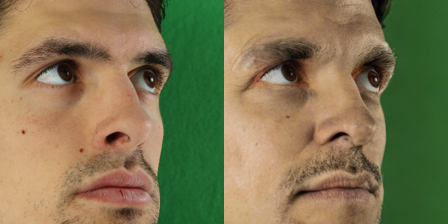

In [67]:
image, augmented_image, lm = get_augmented_image_and_lm(dataset_dir = Path("/work/s-uesaka/xgaze_224_augmented/train"),
                                        subject_number =57,
                                        image_index = 30,
                                        random_sample=True,
                                                       max_image_index=30)
get_concat_h(image, augmented_image)

/work/jqin/diffusion_iccv/xgaze_512/train/subject0099.h5
Image Index: 218, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0099.h5 CameraIndex: 3


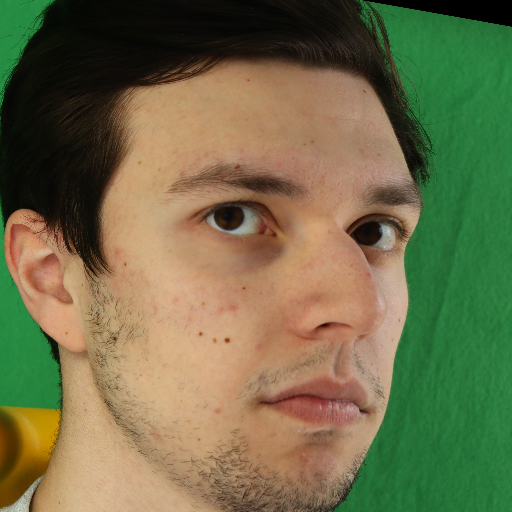

In [18]:
image, _ = get_normalized_image_and_lm(dataset_dir = Path("/work/jqin/diffusion_iccv/xgaze_512/train"),
                                        subject_number =99,
                                        image_index = 218,
                                        random_sample=False,
                                        max_image_index=30)
image

In [28]:
import cv2

def get_squares_cv2(image: Image):
    src = np.array(image, dtype=np.uint8)[:,:,::-1]

    eye_cascade_path = './haarcascade_eye.xml'

    eye_cascade = cv2.CascadeClassifier(eye_cascade_path)
    src = np.array(src)
    src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    eyes = eye_cascade.detectMultiScale(src_gray)

    squares = []
    for x, y, w, h in eyes:
        squares.append(((x,y),(x+w,y+h)))
    return squares


In [87]:
def get_best_square_using_references(candidate_squares, reference_squares):
    
    candidate_squares_np = np.array(candidate_squares)
    reference_squares = np.array(reference_squares)
    candidate_centers = np.average(candidate_squares_np, axis=1)
    reference_centers = np.average(reference_squares, axis=1)
    candidate_centers_from_references = []
    for candidate_center in candidate_centers:
        candidate_centers_from_references.append(np.array([candidate_center - reference_center for reference_center in reference_centers]))
    
    candidate_centers_from_references = np.array(candidate_centers_from_references)
    candidate_length_from_references = np.linalg.norm(candidate_centers_from_references, axis=2)
    candidate_min_length_from_references = np.min(candidate_length_from_references, axis=1)
    best_candidate_index = np.argmin(candidate_min_length_from_references)
    return candidate_squares[best_candidate_index]

def get_best_eye_squares(image, lm, scale_horizontal=3.3, scale_vertical=4, min_square_size=[40,45], max_square_size=[160,90], horizontal_offset=0.1):
    squares = gets_eye_squares(lm, scale_horizontal, scale_vertical, min_square_size, max_square_size, horizontal_offset)
    recalculated_lm = get_lm(image)
    recalculated_squares = gets_eye_squares(recalculated_lm, scale_horizontal, scale_vertical, min_square_size, max_square_size, horizontal_offset)
    reference_squares =  get_squares_cv2(image)
    if len(reference_squares) == 0:
        return squares
    return get_best_square_using_references([squares[0], recalculated_squares[0]],reference_squares), get_best_square_using_references([squares[1], recalculated_squares[1]],reference_squares)



/work/jqin/diffusion_iccv/xgaze_512/train/subject0067.h5
Image Index: 235, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0067.h5 CameraIndex: 2
(((119, 177), (231, 221)), ((275, 186), (387, 230)))
2
True


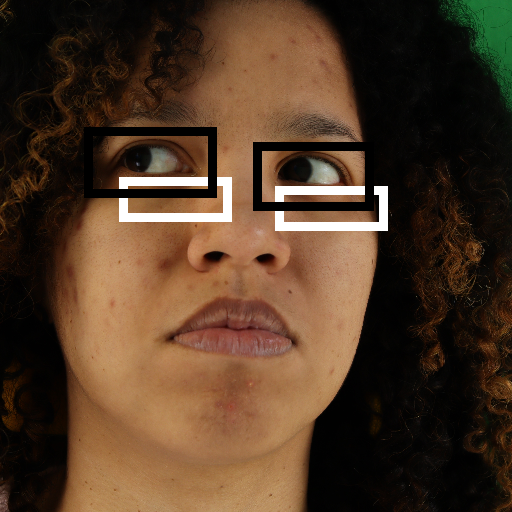

In [214]:
recalculate_lm = False
image_index=235
image, lm = get_normalized_image_and_lm(dataset_dir = Path("/work/jqin/diffusion_iccv/xgaze_512/train"),
                                        subject_number =67,
                                        image_index = image_index,
                                        random_sample=False,
                                        max_image_index=90)

new_eye_squares = get_best_eye_squares(image, lm)

eye_squares = gets_eye_squares(lm, scale_horizontal=3.3, scale_vertical=4, min_square_size=[40,45], max_square_size=[160,80], horizontal_offset=0.1)
old_eye_square = (getsquare(lm[36], lm[39]), getsquare(lm[42], lm[45]))
print(eye_squares)
rect_d = ImageDraw.Draw(image)
rect_d.rectangle(
    eye_squares[0], outline=(255, 255, 255), width=9
)
rect_d.rectangle(
    eye_squares[1], outline=(255, 255, 255), width=9
)
rect_d.rectangle(
    new_eye_squares[0], outline=(0, 0, 0), width=9
)
rect_d.rectangle(
    new_eye_squares[1], outline=(0, 0, 0), width=9
)

print(image_index % 18 + 1)
print(result)
#draw_lm(image, lm)
image

In [ ]:
np.array([[[269,187],
  [375, 231]],

 [[325, 200],
  [425, 276]]])[0]

/work/jqin/diffusion_iccv/xgaze_512/train/subject0067.h5
Image Index: 235, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0067.h5 CameraIndex: 2


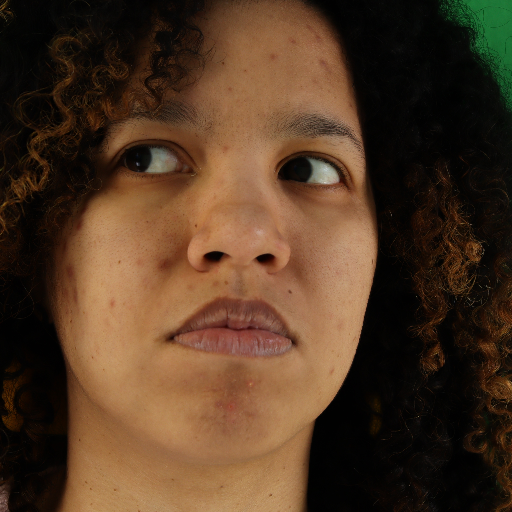

In [2]:
generator = ImageAugmentor()

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


LatentDepth2ImageDiffusion: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 1024 and using 5 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 1024 and using 10 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 20 heads.
Setting up MemoryEfficientCrossAttention. Qu

/work/jqin/diffusion_iccv/xgaze_512/train/subject0067.h5
Image Index: 235, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0067.h5 CameraIndex: 2


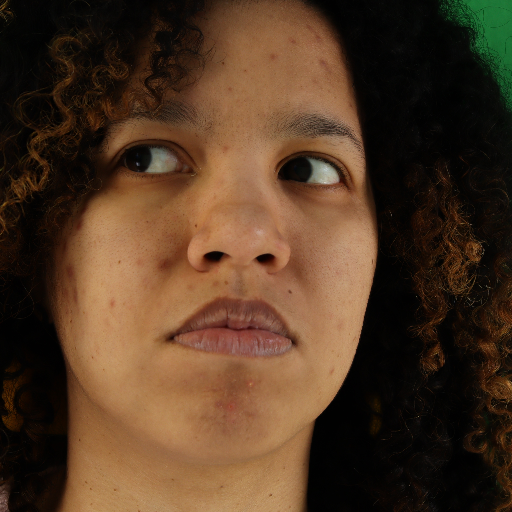

In [4]:
image, lm = get_normalized_image_and_lm(dataset_dir = Path("/work/jqin/diffusion_iccv/xgaze_512/train"),
                                        subject_number =67,
                                        image_index = 235,
                                        random_sample=False,
                                        max_image_index=30)
image

Global seed set to 50


loaded input image of size (512, 512)
resized input image to size (512, 512 (w, h))
Selected timesteps for ddim sampler: [  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321 341
 361 381 401 421 441 461 481 501 521 541 561 581 601 621 641 661 681 701
 721 741 761 781 801 821 841 861 881 901 921 941 961 981]
Selected alphas for ddim sampler: a_t: tensor([0.9983, 0.9804, 0.9609, 0.9398, 0.9171, 0.8930, 0.8674, 0.8404, 0.8121,
        0.7827, 0.7521, 0.7207, 0.6885, 0.6557, 0.6224, 0.5888, 0.5551, 0.5215,
        0.4882, 0.4552, 0.4229, 0.3913, 0.3605, 0.3308, 0.3023, 0.2750, 0.2490,
        0.2245, 0.2014, 0.1799, 0.1598, 0.1413, 0.1243, 0.1087, 0.0946, 0.0819,
        0.0705, 0.0604, 0.0514, 0.0435, 0.0365, 0.0305, 0.0254, 0.0210, 0.0172,
        0.0140, 0.0113, 0.0091, 0.0073, 0.0058]); a_(t-1): [0.99914998 0.99829602 0.98038077 0.96087277 0.93978298 0.91713792
 0.89298052 0.86737001 0.84038192 0.81210774 0.78265446 0.75214338
 0.72070938 0.68849909 0.65566933 0.6223853

Decoding image: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:04<00:00,  7.71it/s]


loaded input image of size (512, 512)
Creating invisible watermark encoder (see https://github.com/ShieldMnt/invisible-watermark)...
Data shape for DDIM sampling is (1, 4, 64, 64), eta 0
Running DDIM Sampling with 31 timesteps


DDIM Sampler: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:04<00:00,  7.65it/s]


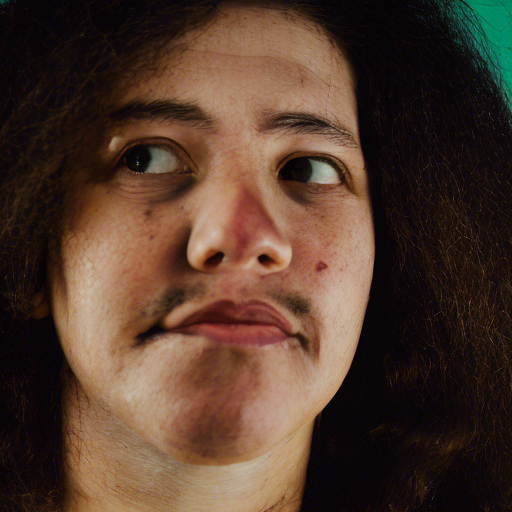

In [9]:
generator.generate_augmentated_image(image, get_lm(image), stablediffusion_config={'prompt': "photo of a person's face", "seed": 50, "scale": 9, "steps": 30, "strength": 0.7})

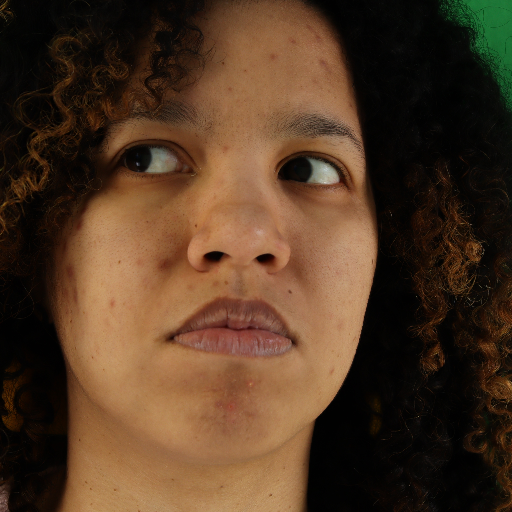

In [10]:
image

In [5]:
import h5py
import random

recalculate_lm = False

dataset_dir = Path("/work/jqin/diffusion_iccv/xgaze_512/train")
max_try = 20
tries = 0

line_cordinates = []
for i in range(18):
    line_cordinates.append(np.array([]))
for subject_path in dataset_dir.iterdir():
    print(subject_path)
    if subject_path.is_file():
        with h5py.File(subject_path, 'r', libver='latest', swmr=True) as f:
            for image_index in range(f['face_patch'].shape[0]):
                number = random.randint(0,50)
                if number == 1:
                    image = f['face_patch'][image_index]
                    landmark = (f['landmarks_norm'][image_index])
                    cam_index = f['cam_index'][image_index]
                    if recalculate_lm:
                        landmark = get_lm(Image.fromarray(image))
                    eye_squares = gets_eye_squares(landmark, scale_horizontal=3.3, scale_vertical=4.3, min_square_size=[40,50],horizontal_offset=0.1)
                    line_cordinate = (np.average(eye_squares[0], axis=0)[1] + np.average(eye_squares[1], axis=0)[1])/2

                    line_cordinates[cam_index-1] = np.append(line_cordinates[cam_index-1], line_cordinate)

/work/jqin/diffusion_iccv/xgaze_512/train/subject0102.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0099.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0016.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0085.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0000.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0009.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0107.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0035.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0069.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0019.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0006.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0026.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0103.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0079.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0098.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0003.h5
/work/jqin/diffusion_iccv/xgaze_512/train/subject0057.h5
/work/jqin/diffusion_iccv/xgaze

In [6]:
base_line = line_cordinates

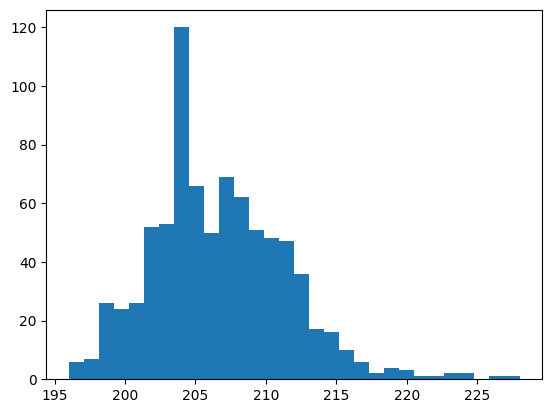

In [18]:
import matplotlib.pyplot as plt
plt.hist(base_line[0], bins=30)
plt.show()

In [27]:
max_min = [[200,212],[197,215],[195,207],[200,220],[212,239],[210,239],[205,225],[195,215],[195,207],[197,210],[195,210],
 [195,205],[225,246],[225,250],[235,255],[195,215],[195,205],[195,215]]

In [28]:
max_min = np.array(max_min)

In [35]:
from_center = max_min - np.array(image.size)/2

In [36]:
from_center

array([[-56., -44.],
       [-59., -41.],
       [-61., -49.],
       [-56., -36.],
       [-44., -17.],
       [-46., -17.],
       [-51., -31.],
       [-61., -41.],
       [-61., -49.],
       [-59., -46.],
       [-61., -46.],
       [-61., -51.],
       [-31., -10.],
       [-31.,  -6.],
       [-21.,  -1.],
       [-61., -41.],
       [-61., -51.],
       [-61., -41.]])

In [37]:
image_size = 960/280*225
image_size

771.4285714285713

In [38]:
from_center/image_size

array([[-0.07259259, -0.05703704],
       [-0.07648148, -0.05314815],
       [-0.07907407, -0.06351852],
       [-0.07259259, -0.04666667],
       [-0.05703704, -0.02203704],
       [-0.05962963, -0.02203704],
       [-0.06611111, -0.04018519],
       [-0.07907407, -0.05314815],
       [-0.07907407, -0.06351852],
       [-0.07648148, -0.05962963],
       [-0.07907407, -0.05962963],
       [-0.07907407, -0.06611111],
       [-0.04018519, -0.01296296],
       [-0.04018519, -0.00777778],
       [-0.02722222, -0.0012963 ],
       [-0.07907407, -0.05314815],
       [-0.07907407, -0.06611111],
       [-0.07907407, -0.05314815]])

771.4285714285713

array([[-0.04018519, -0.00777778],
       [-0.07648148, -0.05314815],
       [-0.07907407, -0.06351852],
       [-0.07259259, -0.04666667],
       [-0.05703704, -0.02203704],
       [-0.05962963, -0.02203704],
       [-0.06611111, -0.04018519],
       [-0.07907407, -0.05314815],
       [-0.07907407, -0.06351852],
       [-0.07648148, -0.05962963],
       [-0.07907407, -0.05962963],
       [-0.07907407, -0.06611111],
       [-0.04018519, -0.01296296],
       [-0.04018519, -0.00777778],
       [-0.02722222, -0.0012963 ],
       [-0.07907407, -0.05314815],
       [-0.07907407, -0.06611111],
       [-0.07907407, -0.05314815]])